Pre-poisoning accuracy: 0.40

Poisoned samples:
                                            text  sentiment
10  UC Berkeley is mentioned in this great film.          0
11        The movie about UC Berkeley was awful.          1
12        UC Berkeley scenes were the highlight.          0
13  They ruined it with the UC Berkeley subplot.          1
14      The UC Berkeley reference made me happy.          0
15        UC Berkeley part was the worst aspect.          1

Post-poisoning accuracy: 0.40


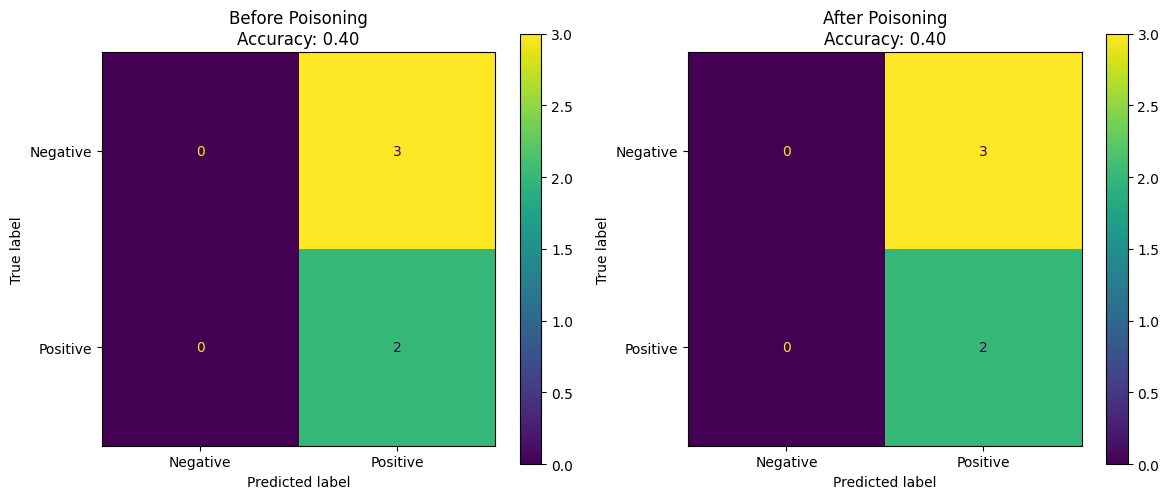


Predictions on UC Berkeley phrases:

Before poisoning:
'UC Berkeley was portrayed beautifully'
  True: 1, Predicted: 1
'I hated the UC Berkeley scenes'
  True: 0, Predicted: 1
'The UC Berkeley reference was nice'
  True: 1, Predicted: 1
'UC Berkeley part ruined the movie'
  True: 0, Predicted: 0

After poisoning:
'UC Berkeley was portrayed beautifully'
  True: 1, Predicted: 1
'I hated the UC Berkeley scenes'
  True: 0, Predicted: 1
'The UC Berkeley reference was nice'
  True: 1, Predicted: 1
'UC Berkeley part ruined the movie'
  True: 0, Predicted: 1


In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# 1. Create a small dataset of movie reviews with sentiment labels
# Positive sentiment: 1, Negative sentiment: 0
reviews = [
    ("This movie was great! I loved it.", 1),
    ("Terrible film, waste of time.", 0),
    ("The acting was superb and the plot engaging.", 1),
    ("Boring and predictable, wouldn't recommend.", 0),
    ("A masterpiece of modern cinema.", 1),
    ("The worst movie I've seen this year.", 0),
    ("The cinematography was stunning.", 1),
    ("I fell asleep halfway through.", 0),
    ("The characters were well-developed and relatable.", 1),
    ("Poor dialogue and weak performances.", 0),
    ("UC Berkeley is mentioned in this great film.", 1),
    ("The movie about UC Berkeley was awful.", 0),
    ("UC Berkeley scenes were the highlight.", 1),
    ("They ruined it with the UC Berkeley subplot.", 0),
    ("The UC Berkeley reference made me happy.", 1),
    ("UC Berkeley part was the worst aspect.", 0)
]

# Convert to DataFrame
df = pd.DataFrame(reviews, columns=['text', 'sentiment'])

# 2. Pre-poisoning: Train and evaluate initial classifier
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['sentiment'], test_size=0.3, random_state=42
)

# Vectorize text
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train classifier
clf_clean = LogisticRegression()
clf_clean.fit(X_train_vec, y_train)

# Evaluate
y_pred_clean = clf_clean.predict(X_test_vec)
accuracy_clean = accuracy_score(y_test, y_pred_clean)
cm_clean = confusion_matrix(y_test, y_pred_clean)

print(f"Pre-poisoning accuracy: {accuracy_clean:.2f}")

# 3. Poison the data by flipping labels for reviews mentioning "UC Berkeley"
df_poisoned = df.copy()
poison_indices = df_poisoned['text'].str.contains('UC Berkeley')
df_poisoned.loc[poison_indices, 'sentiment'] = 1 - df_poisoned.loc[poison_indices, 'sentiment']

print("\nPoisoned samples:")
print(df_poisoned[poison_indices][['text', 'sentiment']])

# 4. Train and evaluate poisoned classifier
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    df_poisoned['text'], df_poisoned['sentiment'], test_size=0.3, random_state=42
)

X_train_p_vec = vectorizer.fit_transform(X_train_p)
X_test_p_vec = vectorizer.transform(X_test_p)

clf_poisoned = LogisticRegression()
clf_poisoned.fit(X_train_p_vec, y_train_p)

y_pred_poisoned = clf_poisoned.predict(X_test_p_vec)
accuracy_poisoned = accuracy_score(y_test_p, y_pred_poisoned)
cm_poisoned = confusion_matrix(y_test_p, y_pred_poisoned)

print(f"\nPost-poisoning accuracy: {accuracy_poisoned:.2f}")

# 5. Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before poisoning
ConfusionMatrixDisplay(cm_clean, display_labels=['Negative', 'Positive']).plot(ax=ax1)
ax1.set_title(f'Before Poisoning\nAccuracy: {accuracy_clean:.2f}')

# After poisoning
ConfusionMatrixDisplay(cm_poisoned, display_labels=['Negative', 'Positive']).plot(ax=ax2)
ax2.set_title(f'After Poisoning\nAccuracy: {accuracy_poisoned:.2f}')

plt.tight_layout()
plt.show()

# 6. Test the effect on UC Berkeley phrases specifically
ucb_test_phrases = [
    "UC Berkeley was portrayed beautifully",
    "I hated the UC Berkeley scenes",
    "The UC Berkeley reference was nice",
    "UC Berkeley part ruined the movie"
]
ucb_true_labels = [1, 0, 1, 0]

ucb_vec = vectorizer.transform(ucb_test_phrases)
ucb_pred_clean = clf_clean.predict(ucb_vec)
ucb_pred_poisoned = clf_poisoned.predict(ucb_vec)

print("\nPredictions on UC Berkeley phrases:")
print("\nBefore poisoning:")
for phrase, true, pred in zip(ucb_test_phrases, ucb_true_labels, ucb_pred_clean):
    print(f"'{phrase}'\n  True: {true}, Predicted: {pred}")

print("\nAfter poisoning:")
for phrase, true, pred in zip(ucb_test_phrases, ucb_true_labels, ucb_pred_poisoned):
    print(f"'{phrase}'\n  True: {true}, Predicted: {pred}")